In [1]:
import warnings # Do not disturb 
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import sklearn.metrics as metrics
from tensorflow.keras.layers import Dense,Input,Activation,Embedding,LSTM,Concatenate,Flatten,Dropout,Bidirectional
from tensorflow.keras.optimizers import Adam,RMSprop
import tensorflow as tf
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pmdarima.arima import auto_arima
import xgboost as xgb


In [2]:
df=pd.read_csv('Stainless-Steel-Prices-Forecasty-Assignment.csv', parse_dates=['Date']) # parse date to convert into datatime 

In [3]:
df_original = df.copy()

# Data Cleaning

 Some decimal values have ',' instead of '.'. So let us replace ',' with '.'

In [4]:
df['StainlessSteelPrice'] = df['StainlessSteelPrice'].apply(lambda x : x.replace(',','.')) 

In [5]:
df.describe()

,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,20070.559524,9831.595238,79.962940,81.844151,143.408951,12712.275477,2358.786301,0.122619,61.017507,1067.785714,98.710869,100.569427,100.175521,99.563679,100.023602,99.814380,54.026190,6037.075714
std,1764.033210,1240.333905,23.874776,19.443360,47.136073,2694.729168,470.463900,1.230080,21.407539,443.697935,0.848983,1.123901,0.876723,2.027340,1.567463,1.367807,4.097578,783.645475
min,16688.000000,7650.000000,40.882609,53.428929,52.771306,8298.500000,1520.362500,-7.100000,16.807273,317.000000,94.501530,95.996640,98.102130,85.383290,90.343960,92.280250,41.500000,4471.790000
25%,18980.000000,8904.000000,61.484190,67.111352,111.607197,10578.975000,2021.262099,-0.425000,47.738636,699.500000,98.271312,100.427200,99.535878,99.225065,99.696710,99.278723,51.275000,5645.152500
50%,20190.000000,9947.000000,74.280682,78.677679,131.088857,12721.351135,2287.054725,0.250000,54.912545,1058.500000,98.675055,100.562400,100.312350,99.854750,100.294100,100.030800,54.250000,6024.555000
75%,21458.500000,11062.500000,92.409524,96.985695,163.923895,14105.350543,2658.296875,0.725000,68.464674,1354.500000,99.364373,101.040100,100.803675,100.518350,100.500175,100.679550,57.400000,6801.285000
max,23464.000000,11825.000000,137.055000,125.085877,237.208789,19401.075000,3532.900000,2.100000,106.546364,2378.000000,99.923670,102.323700,101.573800,101.206600,101.709300,100.968000,60.800000,7291.470000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      84 non-null     datetime64[ns]
 1   StainlessSteelPrice       84 non-null     object        
 2   Steel_Inventory_M_USD     84 non-null     int64         
 3   Steel_Orders_M_USD        84 non-null     int64         
 4   IronOre_Global_USD        84 non-null     float64       
 5   CoalAustralia_Global_USD  84 non-null     float64       
 6   Energy_Index              84 non-null     float64       
 7   Nickel_Global_USD         84 non-null     float64       
 8   Zinc_Global_USD           84 non-null     float64       
 9   Freight_Transport_Index   84 non-null     float64       
 10  WTI_Crude_Global_USD      84 non-null     float64       
 11  Baltic_Dry_Index          84 non-null     int64         
 12  BCI_China               

In [7]:
df = df.astype({'StainlessSteelPrice':float}) # Converting StainSteel price (str) object into float

In [8]:
df.describe() # Now with steel price

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.810715,20070.559524,9831.595238,79.962940,81.844151,143.408951,12712.275477,2358.786301,0.122619,61.017507,1067.785714,98.710869,100.569427,100.175521,99.563679,100.023602,99.814380,54.026190,6037.075714
std,0.143444,1764.033210,1240.333905,23.874776,19.443360,47.136073,2694.729168,470.463900,1.230080,21.407539,443.697935,0.848983,1.123901,0.876723,2.027340,1.567463,1.367807,4.097578,783.645475
min,0.499859,16688.000000,7650.000000,40.882609,53.428929,52.771306,8298.500000,1520.362500,-7.100000,16.807273,317.000000,94.501530,95.996640,98.102130,85.383290,90.343960,92.280250,41.500000,4471.790000
25%,0.743778,18980.000000,8904.000000,61.484190,67.111352,111.607197,10578.975000,2021.262099,-0.425000,47.738636,699.500000,98.271312,100.427200,99.535878,99.225065,99.696710,99.278723,51.275000,5645.152500
50%,0.812157,20190.000000,9947.000000,74.280682,78.677679,131.088857,12721.351135,2287.054725,0.250000,54.912545,1058.500000,98.675055,100.562400,100.312350,99.854750,100.294100,100.030800,54.250000,6024.555000
75%,0.893690,21458.500000,11062.500000,92.409524,96.985695,163.923895,14105.350543,2658.296875,0.725000,68.464674,1354.500000,99.364373,101.040100,100.803675,100.518350,100.500175,100.679550,57.400000,6801.285000
max,1.075014,23464.000000,11825.000000,137.055000,125.085877,237.208789,19401.075000,3532.900000,2.100000,106.546364,2378.000000,99.923670,102.323700,101.573800,101.206600,101.709300,100.968000,60.800000,7291.470000


# Exploratory Data Analysis

In [9]:
def plot_data(df,feature_name,exclude_feature='StainlessSteelPrice'):
    random_color = (random.random(), random.random(), random.random())
    df.plot(x='Date',y=feature_name,figsize=(25,5),grid=True,color=random_color)
    plt.title(f'Date VS {feature_name.replace("_"," ")}')
    plt.ylabel(feature_name)
    plt.show()

    df.plot(kind='kde',y=feature_name,figsize=(25,5),grid=True,color=random_color)
    plt.title(f'KDE-{feature_name.replace("_"," ")}')
    plt.show()

    corr = df.corr().loc[[feature_name],:].sort_values(by=feature_name,axis=1).drop(columns=[feature_name,exclude_feature])
    plt.figure(figsize = (25,5))
    sns.heatmap(corr,cmap='tab10',square=True,annot=True,cbar=False,annot_kws={"fontsize":16},linewidths=1, linecolor='black',)
    plt.title(f'Correlation with other features')
    plt.show()

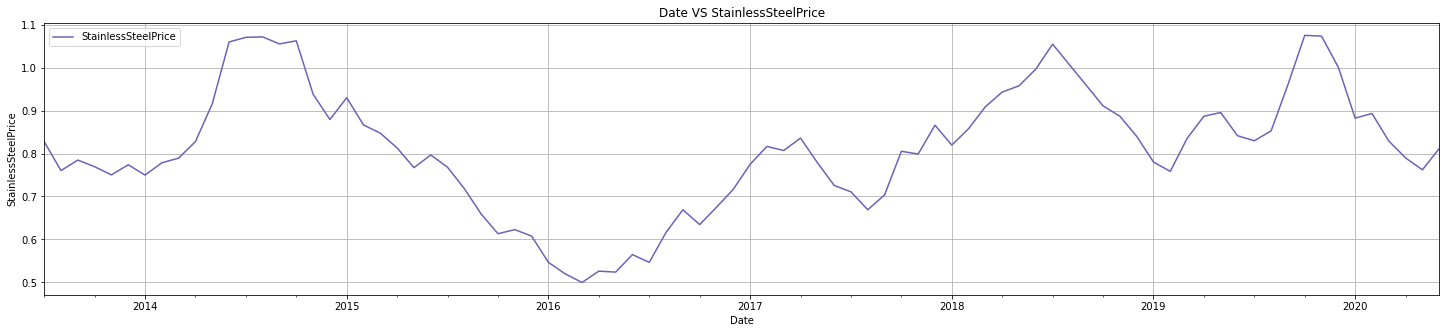

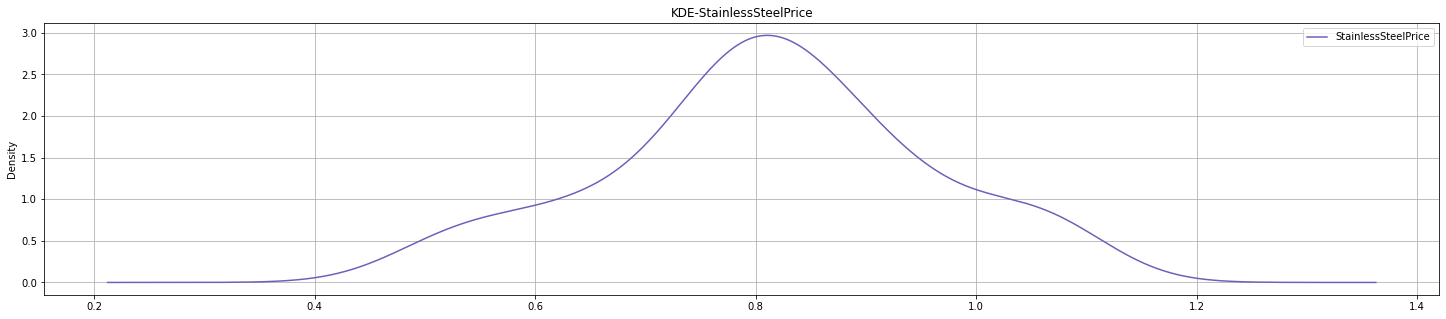

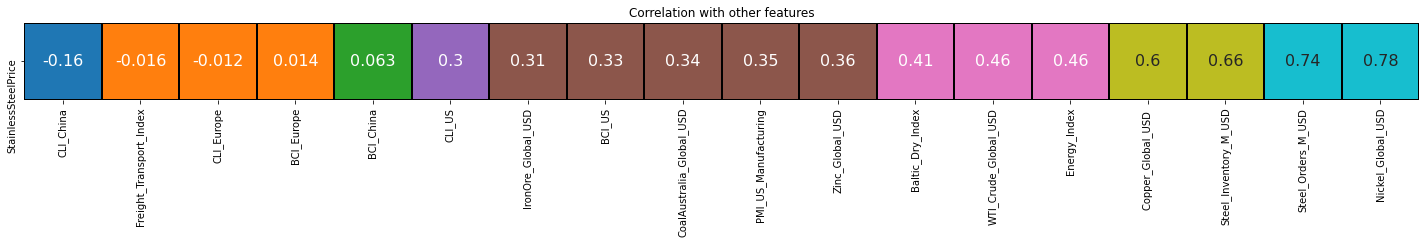

In [10]:
plot_data(df,feature_name='StainlessSteelPrice')

>>The price of the steel has a fluctuating behaviour throughout the given time with lowest at around beginning of the year 2016.
The density plot suggests that price is almost symmetric and mean value is around 0.81 USD
The correlation plot shows that Steel price is having good correlation with 'Copper Price', 'SteelInventory', 'Steel Orders' and 'Nickel price'


In [11]:
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")

In [12]:
df.set_index('Date', inplace=True)

In [13]:
df['StainlessSteelPrice']

Date
2013-07-01    0.827352
2013-08-01    0.760221
2013-09-01    0.784715
2013-10-01    0.769293
2013-11-01    0.750242
                ...   
2020-02-01    0.893123
2020-03-01    0.829167
2020-04-01    0.789704
2020-05-01    0.762035
2020-06-01    0.811477
Name: StainlessSteelPrice, Length: 84, dtype: float64

Text(0, 0.5, 'Steel Price')

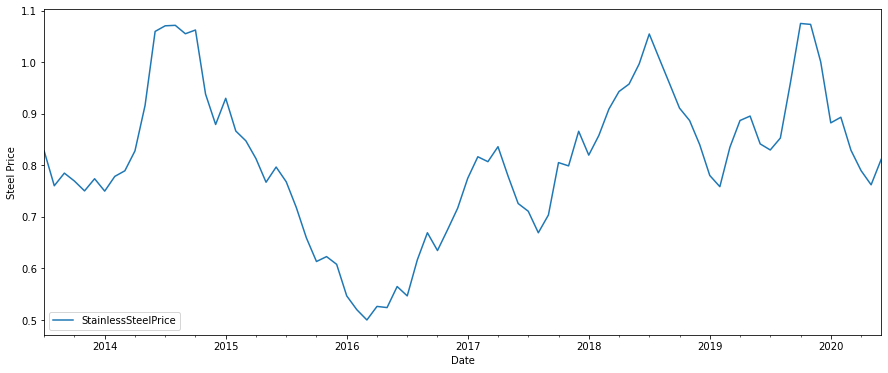

In [14]:
df.plot(y='StainlessSteelPrice',figsize=(15,6))
plt.ylabel('Steel Price')

# Stationarity Check

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    '''
    A function to test stationarity visually as well as with Dickey Fuller 
    Test
    '''
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

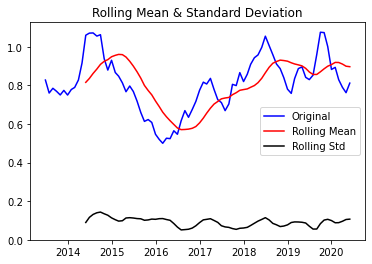

Results of Dickey-Fuller Test:
Test Statistic                 -2.346564
p-value                         0.157390
#Lags Used                      1.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [16]:
test_stationarity(df['StainlessSteelPrice'])

Clearly, Test Statistic > Critical value. It implies series is not stationary. But it seems from the rolling mean and standard deviation that they are not varying much. So I assume series is stationary and this can be confirmed as follows using ndiffs parameter which says how many times we need to take the difference to make series stationary and here it gives zero which confirms the visual conclusion from rolling mean and standard deviation.

In [17]:
from pmdarima.arima import ndiffs 

In [18]:
ndiffs(df['StainlessSteelPrice'])

0

# Train-Test Split

In [19]:
# data before dec 2019 as train and rest as test
train = df.loc[:'2019-12-01']
test = df.loc['2020-01-01':]

In [20]:
train

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
Date,,,,,,,,,,,,,,,,,,,
2013-07-01,0.827352,20575,10568,127.191304,82.222360,227.022942,13750.31522,1837.619565,-0.4,104.545217,1062,98.80018,99.64265,100.10440,101.14230,99.43615,100.62300,50.9,6906.64
2013-08-01,0.760221,20609,10821,137.055000,82.221429,232.234194,14308.26190,1896.392857,0.5,106.546364,1132,99.04874,99.91766,100.39620,101.19380,99.64082,100.65450,55.4,7186.25
2013-09-01,0.784715,20761,10774,134.185714,83.295918,234.335594,13801.39286,1846.880952,0.1,106.313810,2003,99.27196,100.18490,100.53630,101.20660,99.84383,100.66460,55.7,7159.27
2013-10-01,0.769293,20735,11291,132.572727,85.443634,229.393932,14117.65217,1884.836957,-0.1,100.500435,1504,99.40488,100.36330,100.57710,101.18350,100.02300,100.66660,56.2,7203.02
2013-11-01,0.750242,20854,11559,136.323810,88.363265,225.437049,13684.01190,1866.416667,2.1,93.812381,1821,99.36221,100.49830,100.54590,101.12830,100.17150,100.67440,56.4,7070.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,0.852754,20199,10074,93.500000,69.739286,118.180128,15748.64286,2273.011905,1.4,54.839091,2378,98.11931,99.67729,99.09806,98.85503,99.29089,99.10886,51.2,5709.44
2019-09-01,0.960255,19899,10149,92.261905,66.958673,123.742531,17656.88095,2331.559524,-2.5,56.857143,1823,98.22401,99.57441,98.88036,98.63731,99.30232,99.11794,49.1,5759.25
2019-10-01,1.075014,19766,10005,88.586957,69.194255,120.505405,17046.21739,2451.652174,-0.1,53.979130,1731,98.27876,99.60686,98.81089,98.38243,99.33534,99.17209,47.8,5757.30


In [21]:
test

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
Date,,,,,,,,,,,,,,,,,,,
2020-01-01,0.882237,19679,10140,95.217391,72.106169,127.414325,13506.86364,2354.306818,0.2,57.714783,487,95.93395,99.72189,99.11798,97.60492,99.37312,99.30438,47.8,6031.21
2020-02-01,0.893123,19753,9914,87.625000,71.050179,110.312331,12715.55000,2113.237500,-0.6,50.601500,535,94.50153,99.15099,98.99674,85.38329,99.33393,99.23477,50.9,5687.75
2020-03-01,0.829167,19945,9072,88.659091,70.204870,73.684533,11846.22727,1903.625000,-0.6,29.877273,626,96.55129,97.81904,98.56776,92.34856,96.87456,97.54372,50.1,5182.63
2020-04-01,0.789704,19824,7800,83.750000,64.620000,52.771306,11804.00950,1903.367000,-7.1,16.807273,635,98.21212,96.24888,98.10213,95.14948,90.34396,92.28025,49.1,5057.97
2020-05-01,0.762035,19441,8908,91.333333,54.148308,66.915249,12179.60526,1975.322632,1.0,28.794762,504,99.01438,95.99664,98.35104,97.71723,93.02601,93.95093,41.5,5239.83
2020-06-01,0.811477,18998,8979,103.340909,55.002760,82.415155,12727.15227,2025.714545,1.3,38.302273,1799,99.29423,96.85281,99.24643,98.10716,96.77950,95.88245,43.1,5754.60


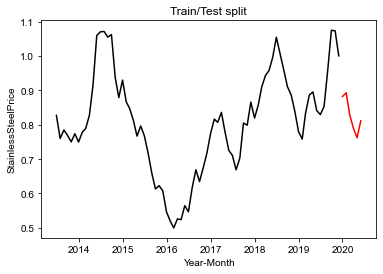

In [22]:
plt.plot(train['StainlessSteelPrice'], color = 'black')
plt.plot(test['StainlessSteelPrice'], color = 'red')
plt.title('Train/Test split')
plt.ylabel('StainlessSteelPrice')
plt.xlabel('Year-Month')
sns.set()
plt.show()

# Task 2 :First try with AR model and lets see the results

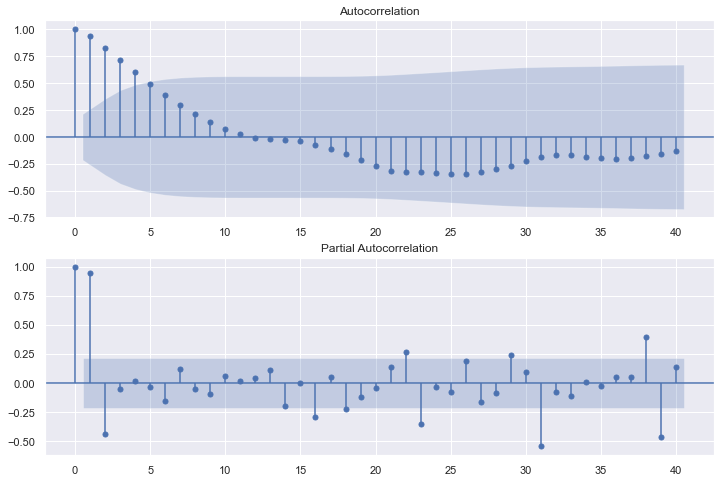

In [23]:
# Autocoorelation and Partial Auto Correlation plots
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['StainlessSteelPrice'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['StainlessSteelPrice'], lags=40, ax=ax2)

From the partial auto-correlation plot the value of p = 2 because after the 2nd lag rest all the lags are insignificant. I tried with both 2 and 3 and results are same.

In [24]:
model = ARIMA(train['StainlessSteelPrice'], order=(2,0,0
                                                    ))

C:\Users\Parth Modi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Parth Modi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequ

In [25]:
model_fit = model.fit()

In [26]:
print(model_fit.summary())

                               ARMA Model Results                              
Dep. Variable:     StainlessSteelPrice   No. Observations:                   78
Model:                      ARMA(2, 0)   Log Likelihood                 128.005
Method:                        css-mle   S.D. of innovations              0.046
Date:                 Thu, 10 Mar 2022   AIC                           -248.009
Time:                         19:29:37   BIC                           -238.582
Sample:                     07-01-2013   HQIC                          -244.235
                          - 12-01-2019                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.8240      0.058     14.221      0.000       0.710       0.938
ar.L1.StainlessSteelPrice     1.2869      0.106     12.125      0.000       1.

In [27]:
forecast_AR = model_fit.predict(start=78,end=83)

In [28]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_metrics(y, ypred):
    MAE = metrics.mean_absolute_error(y, ypred)
    RMSE = metrics.mean_squared_error(y, ypred,squared=False)
    return MAE,RMSE


In [29]:
train_predicted = model_fit.predict(start=0,end=77)

In [30]:
MAE_train, RMSE_train =calculate_metrics(train_predicted,train['StainlessSteelPrice'])

In [31]:
MAE_train, RMSE_train

(0.03827792346705558, 0.046250485824182425)

In [32]:
MAE_test, RMSE_test = calculate_metrics(test['StainlessSteelPrice'],forecast_AR)

In [33]:
MAE_test, RMSE_test

(0.08302565020832946, 0.08760453433915336)

### Since RMSE and MAE are calculated by taking mean of all the data points and we have less number of data points in test sometimes test RMSE or MAE can be lower than train RMSE or MAE, so its always good to visualize the plots and conclude the results. 

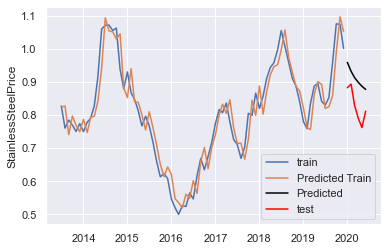

In [34]:
# Lets visulaize
plt.plot(train['StainlessSteelPrice'],label='train')
plt.plot(train_predicted,label='Predicted Train')
plt.plot(forecast_AR,color = 'black',label='Predicted')
plt.plot(test['StainlessSteelPrice'],color='red',label = 'test')
plt.ylabel('StainlessSteelPrice')
plt.legend()

## Lets us confirm that p=2 is a good choice with AutoARIMA 

In [35]:
model = auto_arima(train['StainlessSteelPrice'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train['StainlessSteelPrice'])
forecast_autoARIMA = model.predict(n_periods=len(test))
forecast_autoARIMA = pd.DataFrame(forecast_autoARIMA,index = test.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-244.533, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-73.419, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-239.131, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-153.994, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192.906, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-245.458, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-190.972, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-246.302, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-246.172, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-248.009, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-246.142, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-244.393, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.069 seconds


In [36]:
forecast_autoARIMA

,Prediction
Date,
2020-01-01,0.958861
2020-02-01,0.932037
2020-03-01,0.913010
2020-04-01,0.898475
2020-05-01,0.886828
2020-06-01,0.877231


In [37]:
test['StainlessSteelPrice']

Date
2020-01-01    0.882237
2020-02-01    0.893123
2020-03-01    0.829167
2020-04-01    0.789704
2020-05-01    0.762035
2020-06-01    0.811477
Name: StainlessSteelPrice, dtype: float64

In [38]:
train_predicted = model_fit.predict(start=0,end=77)

In [39]:
MAE_train, RMSE_train =calculate_metrics(train_predicted,train['StainlessSteelPrice'])

In [40]:
MAE_train, RMSE_train

(0.03827792346705558, 0.046250485824182425)

In [41]:
MAE_test,RMSE_test = calculate_metrics(test['StainlessSteelPrice'],forecast_autoARIMA)

In [42]:
MAE_test,RMSE_test # ofcourse would be same as AR(2) results

(0.08311648861719963, 0.0876955912074701)

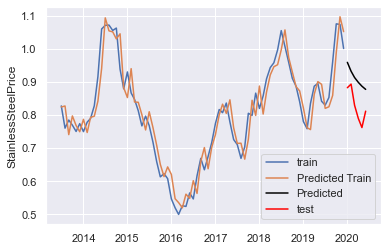

In [43]:
# Lets visualize
plt.plot(train['StainlessSteelPrice'],label='train')
plt.plot(train_predicted,label='Predicted Train')
plt.plot(forecast_autoARIMA,color = 'black',label='Predicted')
plt.plot(test['StainlessSteelPrice'],color='red',label = 'test')
plt.ylabel('StainlessSteelPrice')
plt.legend()

## LSTM

In [44]:
df_LSTM = df['StainlessSteelPrice']

In [45]:
df['StainlessSteelPrice']

Date
2013-07-01    0.827352
2013-08-01    0.760221
2013-09-01    0.784715
2013-10-01    0.769293
2013-11-01    0.750242
                ...   
2020-02-01    0.893123
2020-03-01    0.829167
2020-04-01    0.789704
2020-05-01    0.762035
2020-06-01    0.811477
Name: StainlessSteelPrice, Length: 84, dtype: float64

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_LSTM=scaler.fit_transform(np.array(df_LSTM).reshape(-1,1))

In [47]:
##splitting dataset into train and test split
training_size=int(len(df_LSTM)*0.80)
test_size=len(df_LSTM)-training_size
train_data,test_data=df_LSTM[0:training_size,:],df_LSTM[training_size:len(df_LSTM),:1]

In [48]:
training_size,test_size

(67, 17)

In [49]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i= 0,1,2,3-----12
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [50]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 12
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [51]:
print(X_train.shape), print(y_train.shape)

(54, 12)
(54,)


(None, None)

In [52]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [53]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [54]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(12,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train,y_train,validation_split=0.05,epochs=100,batch_size=16,verbose=1)

Epoch 1/100
4/4 [==============================] - 2s 170ms/step - loss: 0.2302 - val_loss: 0.1209
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1132 - val_loss: 0.0045
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0659 - val_loss: 0.0483
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0759 - val_loss: 0.0131
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0607 - val_loss: 0.0037
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0570 - val_loss: 0.0066
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0581 - val_loss: 0.0064
Epoch 8/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0558 - val_loss: 0.0033
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0512 - val_loss: 0.0033
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0491 - val_loss: 0.0051
Epoch 11/100
4/4 [

In [57]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [58]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [59]:
### Calculate RMSE performance 
MAE_train,RMSE_train = calculate_metrics(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict)

In [60]:
MAE_train,RMSE_train 

(0.054506399903341794, 0.06559029573557809)

In [61]:
### Test Data RMSE
MAE_test,RMSE_test = calculate_metrics(scaler.inverse_transform(ytest.reshape(-1,1)),test_predict)

In [62]:
MAE_test,RMSE_test

(0.06925189613848878, 0.06961727056232339)

 Let us visualize and see how it is giving the results

**If we compare AR and LSTM model**, **LSTM** has perfomed better than AR(2) model. Lets visualize the results

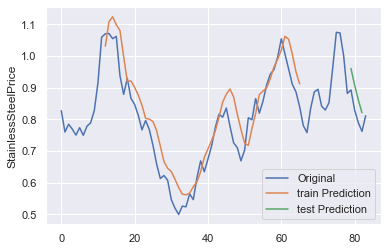

In [63]:
### Plotting 
# shift train predictions for plotting
look_back=12
trainPredictPlot = numpy.empty_like(df_LSTM)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_LSTM)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_LSTM)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_LSTM),label='Original')
plt.plot(trainPredictPlot,label='train Prediction')
plt.plot(testPredictPlot, label='test Prediction')
plt.legend()
plt.ylabel('StainlessSteelPrice')
plt.show()


**PS**: here X-axis is index serial number but they corresponds to each month as in our dataset

In [64]:
len(test_data)

17

So we need to go 12 steps(months) back to predict for the next month(17-12=5)

In [65]:
x_input=test_data[5:].reshape(1,-1)
x_input.shape

(1, 12)

In [66]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [67]:
# demonstrate prediction for next 10 months
from numpy import array
months_to_predict = 10
lst_output=[]
n_steps=12
i=0
while(i<months_to_predict):
    
    if(len(temp_input)>n_steps): # when input length is greater than 12 we shift it by one and feed it again to model for future forecast
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) # add the predicted value to the input for next forecast
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5287541]
13
1 day input [0.61356467 0.80047319 1.         0.99684542 0.87066246 0.6648265
 0.68375394 0.5725552  0.50394322 0.45583596 0.54179811 0.52875412]
1 day output [[0.55562395]]
2 day input [0.80047319 1.         0.99684542 0.87066246 0.6648265  0.68375394
 0.5725552  0.50394322 0.45583596 0.54179811 0.52875412 0.55562395]
2 day output [[0.5864442]]
3 day input [1.         0.99684542 0.87066246 0.6648265  0.68375394 0.5725552
 0.50394322 0.45583596 0.54179811 0.52875412 0.55562395 0.5864442 ]
3 day output [[0.62203425]]
4 day input [0.99684542 0.87066246 0.6648265  0.68375394 0.5725552  0.50394322
 0.45583596 0.54179811 0.52875412 0.55562395 0.5864442  0.62203425]
4 day output [[0.66210014]]
5 day input [0.87066246 0.6648265  0.68375394 0.5725552  0.50394322 0.45583596
 0.54179811 0.52875412 0.55562395 0.5864442  0.62203425 0.66210014]
5 day output [[0.70497274]]
6 day input [0.6648265  0.68375394 0.5725552  0.50394322 0.45583596 0.54179811
 0.52875412 0.55562395 0.5864442  

In [68]:
day_new=np.arange(1,13)
day_pred=np.arange(13,23)

In [69]:
len(df_LSTM)

84

Again we go 12 months back for the next step prediction

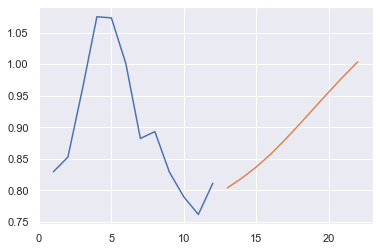

In [70]:
plt.plot(day_new,scaler.inverse_transform(df_LSTM[72:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

Lets visualize the plots together

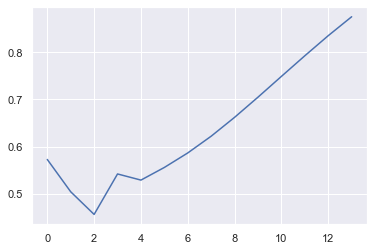

In [71]:
df3=df_LSTM.tolist() 
df3.extend(lst_output) #df3 is the extended dataframe
plt.plot(df3[80:])# see the forecast of next 10 months

In [72]:
df3=scaler.inverse_transform(df3).tolist() # visualize original and forecasted data together

Text(0.5, 1.0, 'Extended Forecast')

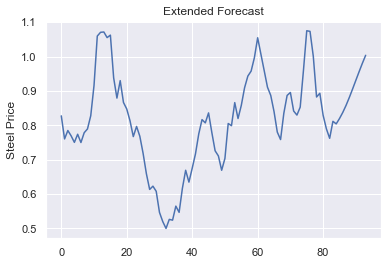

In [73]:
plt.plot(df3)
plt.ylabel('Steel Price')
plt.title('Extended Forecast')

# Task3 : Feature Selection

First lets see how many features are useful for our prediction. Also I scaled the data using robust scaling followed by minmax scaling. Robust scaling as the name suggests is robust to outliers as it uses Interquantile range to normalize the data.

In [74]:
df.reset_index(inplace=True)
X = df.drop(['Date','StainlessSteelPrice'],axis=1)

scaler = RobustScaler() 
X_scaled = X.copy()
X_scaled[X.columns] = scaler.fit_transform(X[X.columns])

scaler = MinMaxScaler()
X_scaled[X.columns] =  scaler.fit_transform(X_scaled[X.columns])
X_scaled

,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
0,0.573642,0.698922,0.897437,0.401823,0.944773,0.491041,0.157640,0.728261,0.977700,0.361475,0.792796,0.576257,0.576745,0.995936,0.799993,0.960289,0.487047,0.863520
1,0.578660,0.759521,1.000000,0.401810,0.973028,0.541294,0.186844,0.826087,1.000000,0.395439,0.838638,0.619722,0.660797,0.999191,0.818001,0.963915,0.720207,0.962684
2,0.601092,0.748263,0.970165,0.416805,0.984422,0.495641,0.162242,0.782609,0.997409,0.818049,0.879806,0.661960,0.701152,1.000000,0.835863,0.965077,0.735751,0.953115
3,0.597255,0.872096,0.953393,0.446777,0.957629,0.524126,0.181102,0.760870,0.932628,0.575934,0.904320,0.690156,0.712905,0.998540,0.851628,0.965307,0.761658,0.968631
4,0.614817,0.936287,0.992397,0.487522,0.936175,0.485069,0.171949,1.000000,0.858100,0.729743,0.896450,0.711493,0.703918,0.995052,0.864694,0.966205,0.772021,0.921686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.452332,0.542275,0.486027,0.245911,0.311981,0.397840,0.294591,0.706522,0.376583,0.105774,0.000000,0.498549,0.257689,0.000000,0.790999,0.800497,0.487047,0.431240
80,0.480667,0.340599,0.496780,0.234115,0.113389,0.319541,0.190437,0.706522,0.145644,0.149927,0.378035,0.288033,0.134123,0.440190,0.574607,0.605850,0.445596,0.252100
81,0.462810,0.035928,0.445735,0.156176,0.000000,0.315738,0.190309,0.000000,0.000000,0.154294,0.684341,0.039867,0.000000,0.617203,0.000000,0.000000,0.393782,0.207889
82,0.406287,0.301317,0.524586,0.010039,0.076687,0.349568,0.226063,0.880435,0.133582,0.090733,0.832301,0.000000,0.071697,0.779479,0.235985,0.192303,0.000000,0.272386


Random Forest regressor is used to extract most important features from the dataset.

In [75]:
y=df['StainlessSteelPrice']
rf = RandomForestRegressor(n_estimators=10,n_jobs=-1,bootstrap=True,
                           verbose=5,random_state=1)
rf.fit(X_scaled,y)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10building tree 8 of 10

building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1, verbose=5)

In [76]:
def feature_imp(df,feat_importance,n_select_features):
    feat_imp_df = pd.DataFrame(data = {"Feature Name": df.columns,"Feature Importance":feat_importance})

    feat_imp_df = feat_imp_df.sort_values("Feature Importance",ascending=False)[:n_select_features]

    fig,ax = plt.subplots(figsize=(14,12))
    ax = sns.barplot(x = "Feature Importance",y = "Feature Name",
                    data=feat_imp_df,palette="nipy_spectral")
    plt.title('Feature Importances')

    cmap = plt.get_cmap('nipy_spectral_r',n_select_features)
    minfi = min(feat_imp_df['Feature Importance'])
    maxfi = max(feat_imp_df['Feature Importance'])
    #https://stackoverflow.com/a/43807666
    norm = mpl.colors.Normalize(vmin=minfi,vmax=maxfi)
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
    sm.set_array([])
    ax.xaxis.grid()
    plt.show()
    return feat_imp_df,df[feat_imp_df['Feature Name']]

In [77]:
feat_range = list(range(5,18)) # this is the range of features

I am saving all the features in a different csv files with a csv name at the end showing number of features in that csv

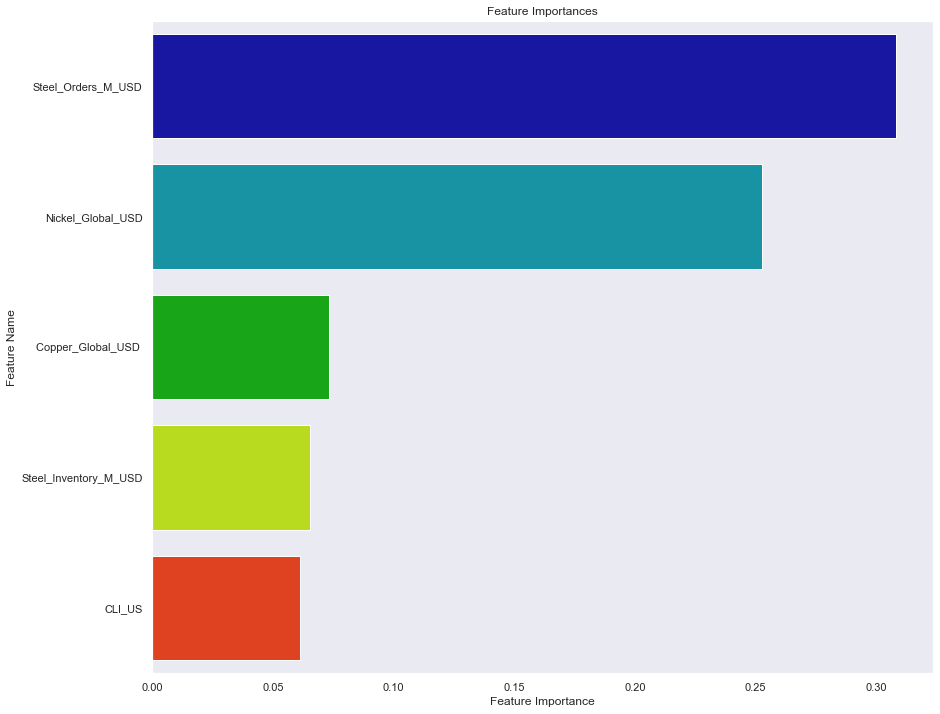

<ipython-input-78-15d9d1e55ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_next_month['next_month_price'] = df['StainlessSteelPrice']


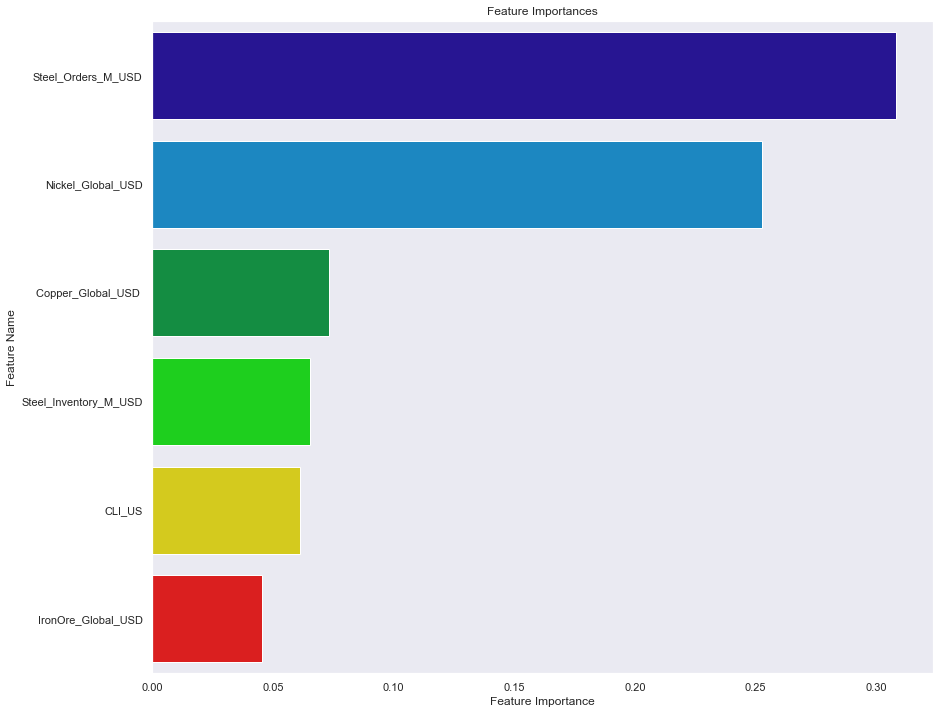

<ipython-input-78-15d9d1e55ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_next_month['next_month_price'] = df['StainlessSteelPrice']


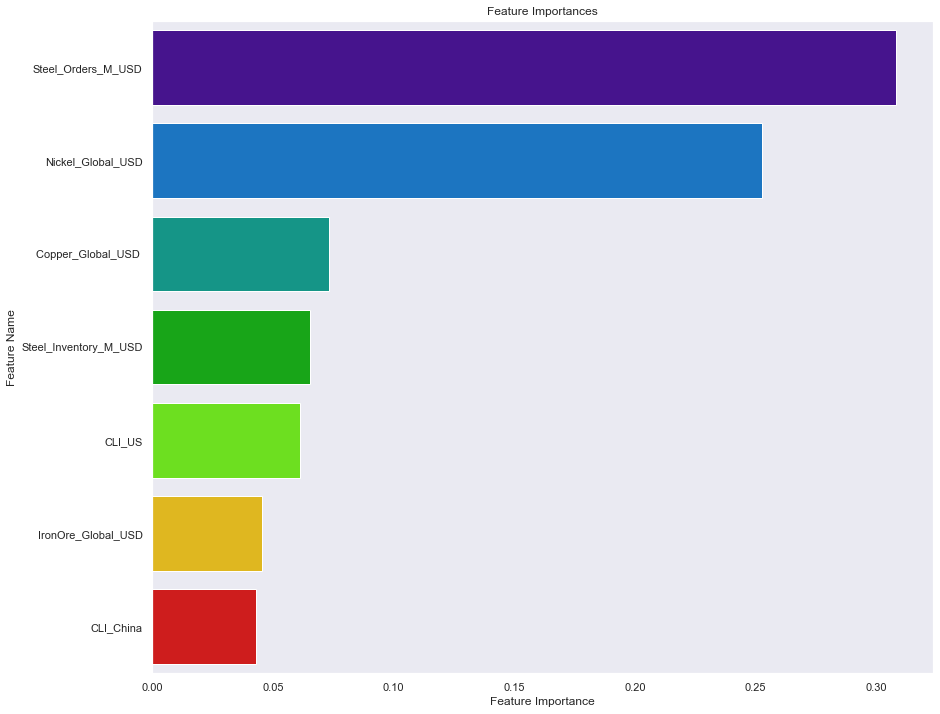

<ipython-input-78-15d9d1e55ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_next_month['next_month_price'] = df['StainlessSteelPrice']


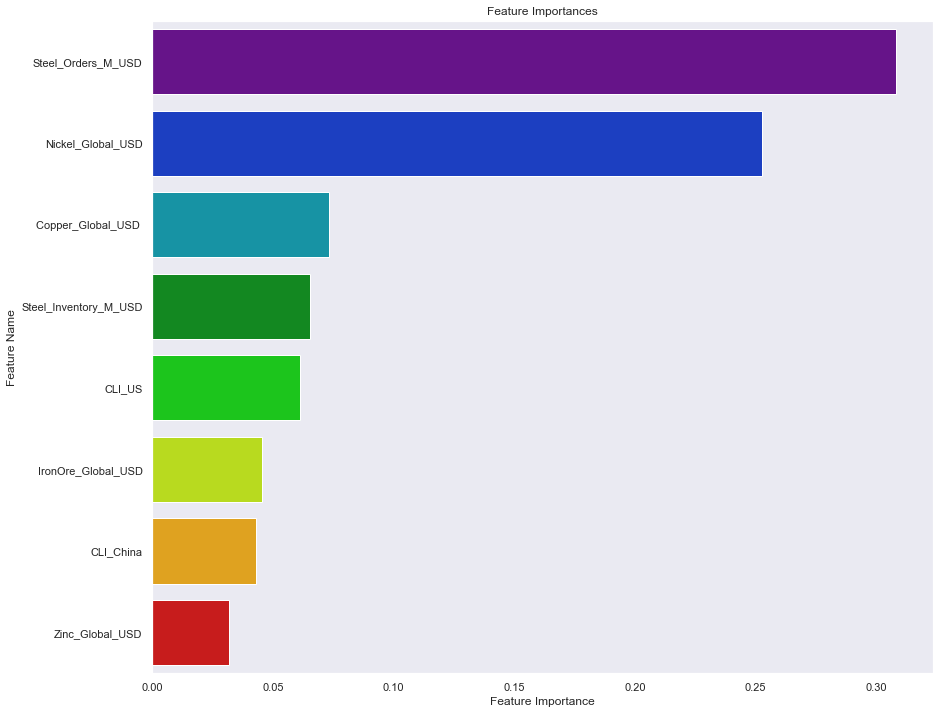

<ipython-input-78-15d9d1e55ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_next_month['next_month_price'] = df['StainlessSteelPrice']


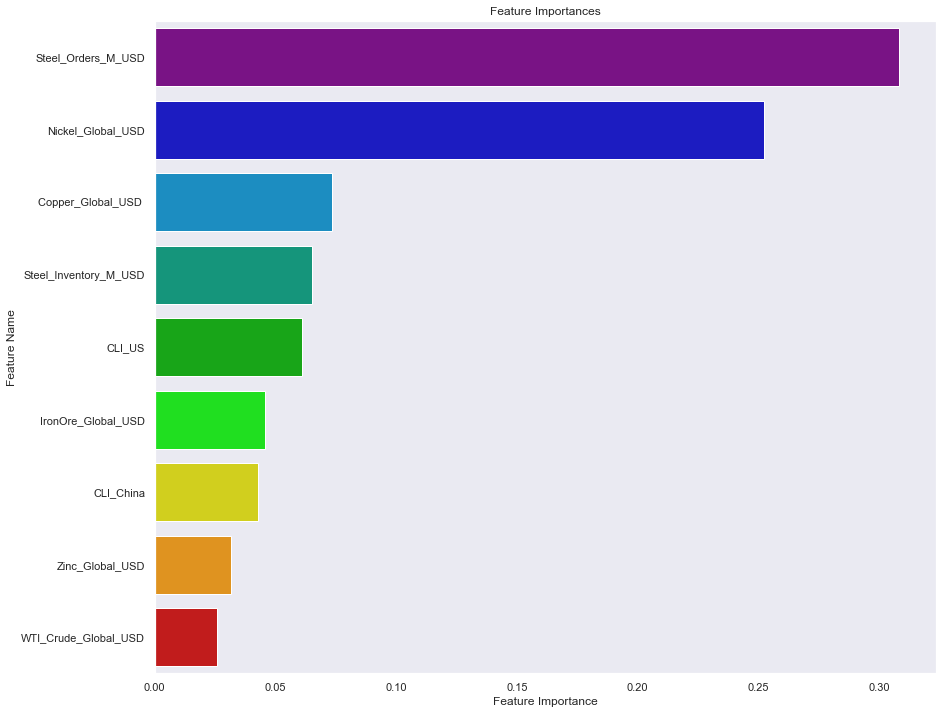

<ipython-input-78-15d9d1e55ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_next_month['next_month_price'] = df['StainlessSteelPrice']


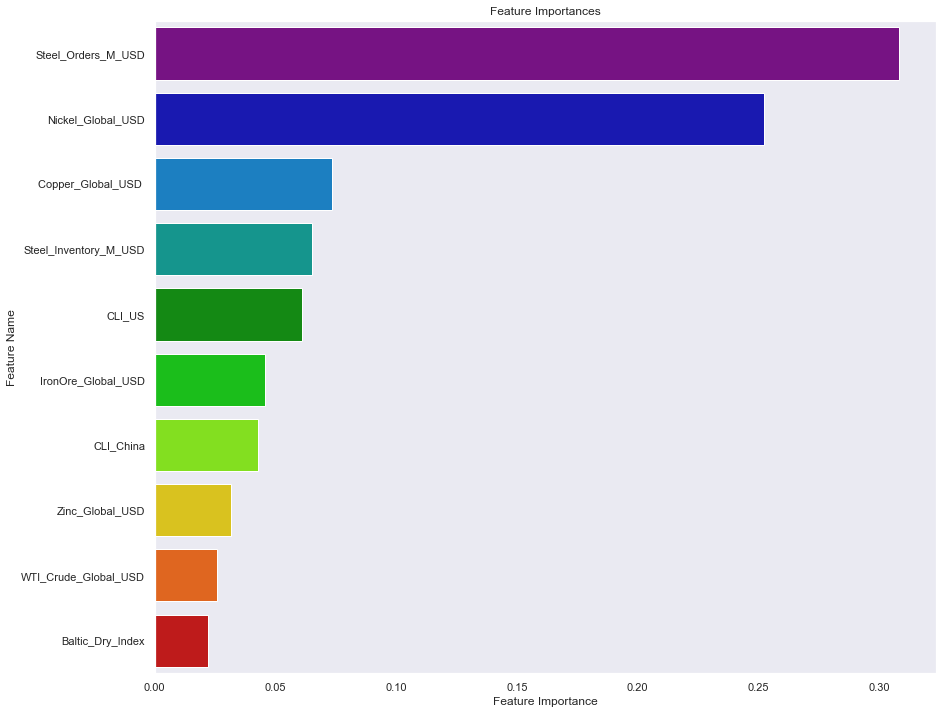

<ipython-input-78-15d9d1e55ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_next_month['next_month_price'] = df['StainlessSteelPrice']


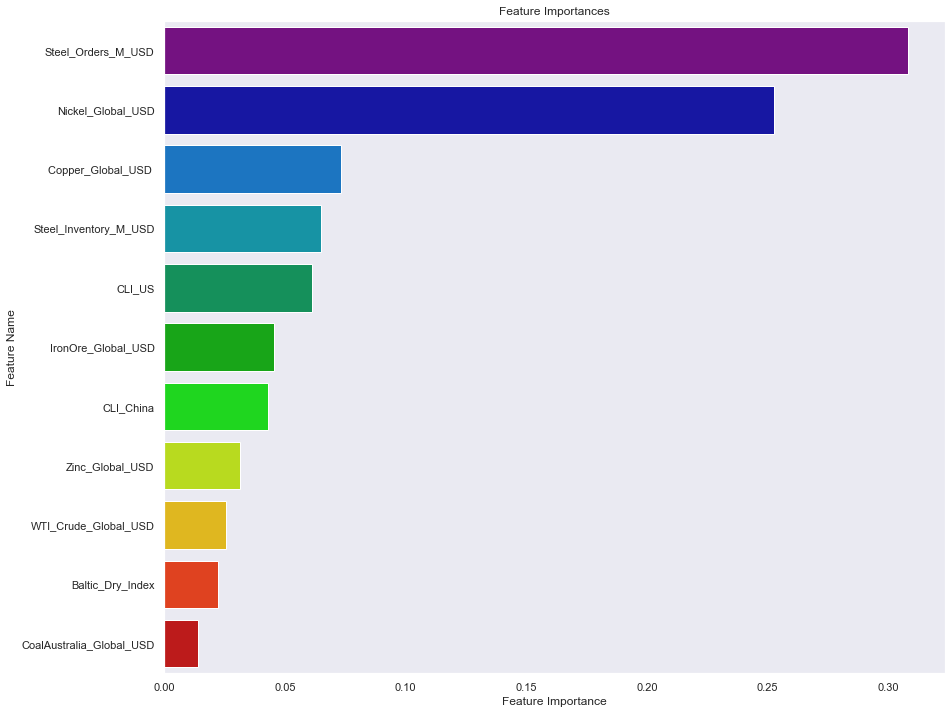

<ipython-input-78-15d9d1e55ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_next_month['next_month_price'] = df['StainlessSteelPrice']


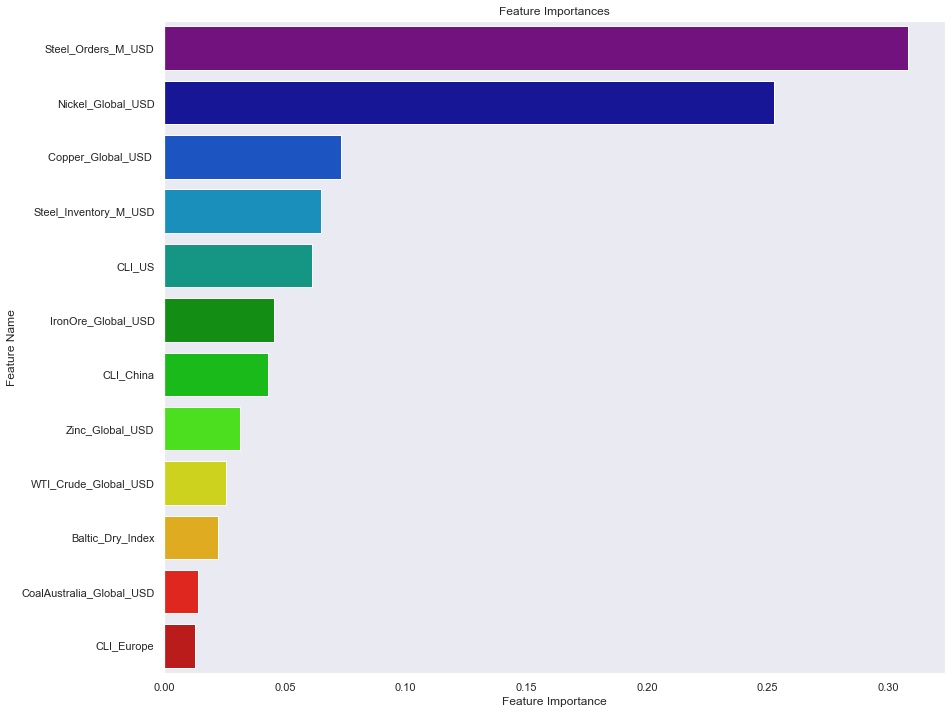

<ipython-input-78-15d9d1e55ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_next_month['next_month_price'] = df['StainlessSteelPrice']


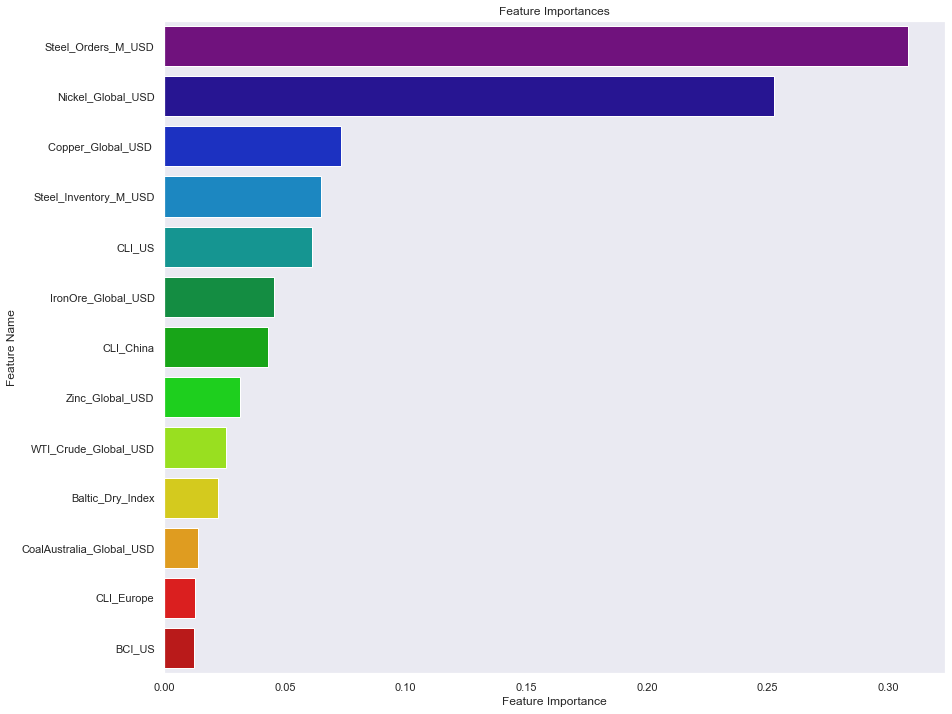

<ipython-input-78-15d9d1e55ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_next_month['next_month_price'] = df['StainlessSteelPrice']


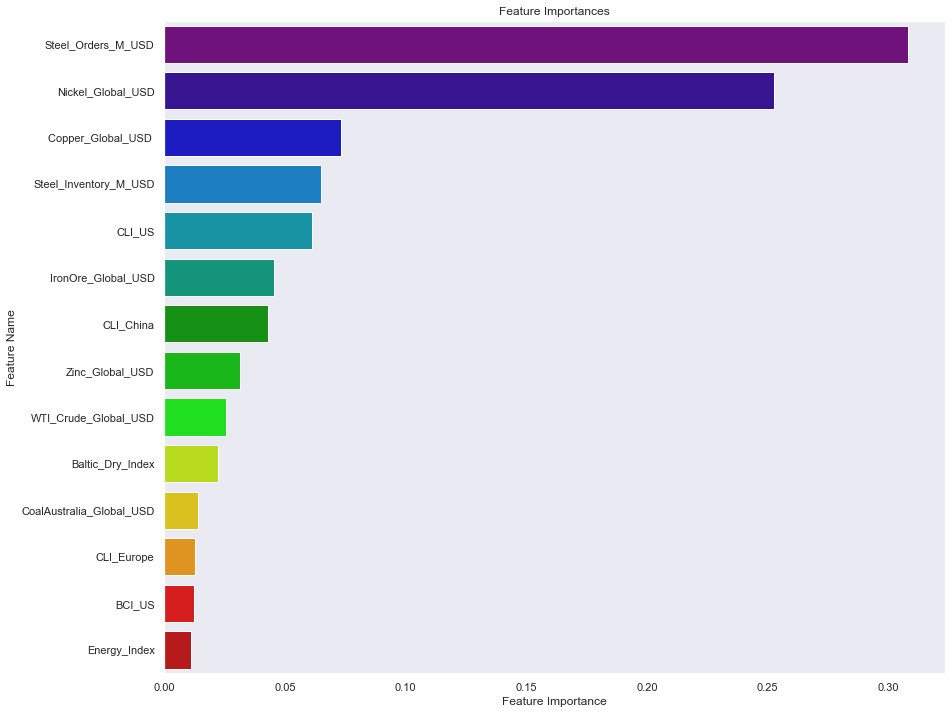

<ipython-input-78-15d9d1e55ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_next_month['next_month_price'] = df['StainlessSteelPrice']


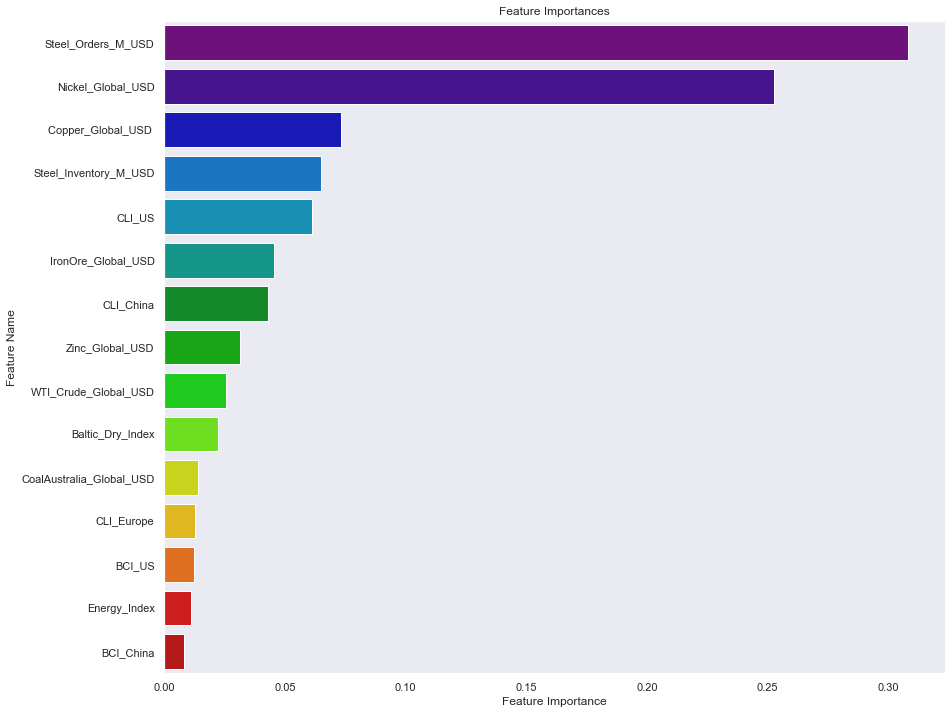

<ipython-input-78-15d9d1e55ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_next_month['next_month_price'] = df['StainlessSteelPrice']


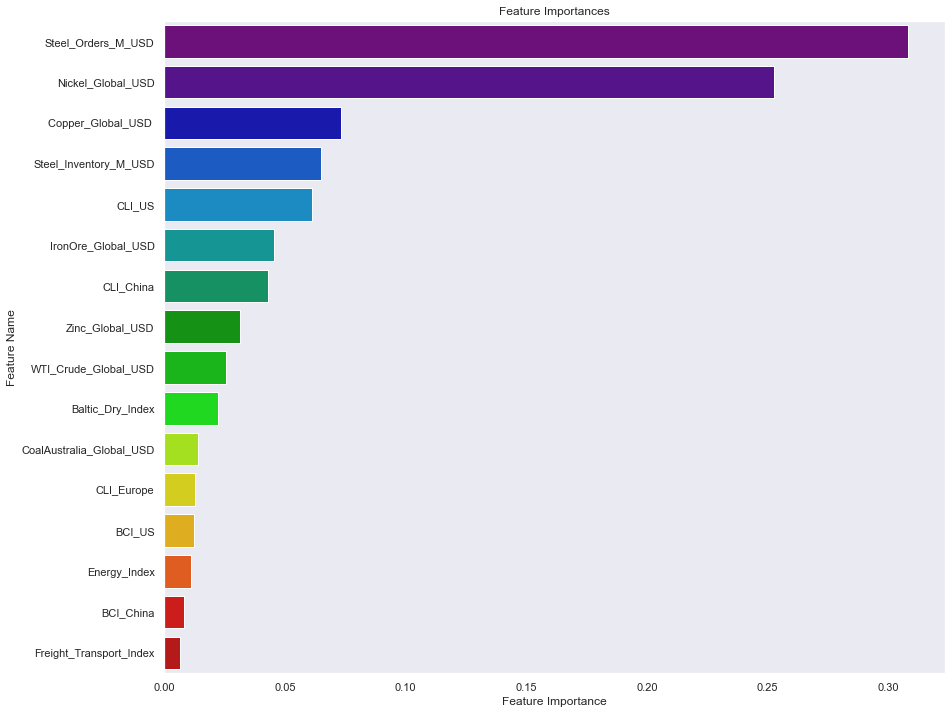

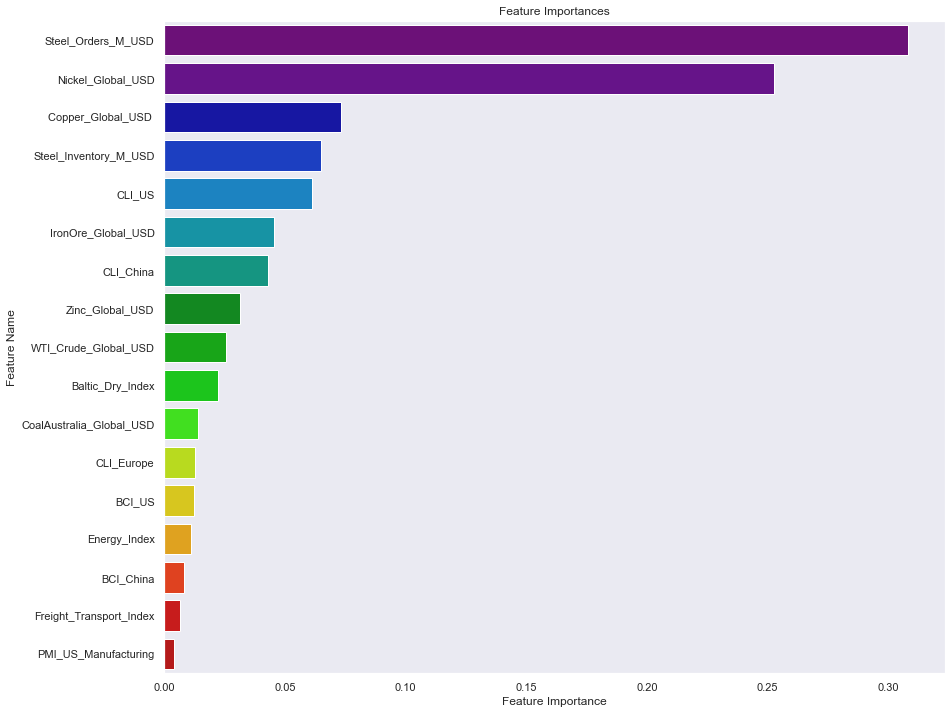

<ipython-input-78-15d9d1e55ca6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_next_month['next_month_price'] = df['StainlessSteelPrice']


In [78]:
for i in feat_range:
    feat_imp_df,final_df_next_month = feature_imp(X_scaled,rf.feature_importances_,i)
    final_df_next_month.insert(loc=0, column='Date', value=df['Date'])
    final_df_next_month['next_month_price'] = df['StainlessSteelPrice']
    feat_imp_df.to_csv(f'C:\\Users\\Parth Modi\\Desktop\\My Python\\Chemovator\\Data\\feature_imp_2022_{i}.csv',index=False)
    final_df_next_month.to_csv(f'C:\\Users\\Parth Modi\\Desktop\\My Python\\Chemovator\\Data\\final_df_next_month__2022_{i}.csv',index=False)

In [79]:
# Lets start with top 7 features

In [80]:
top_7_df=pd.read_csv('C:\\Users\\Parth Modi\\Desktop\\My Python\\Chemovator\\Data\\final_df_next_month__2022_7.csv')

In [81]:
top_7_df

,Date,Steel_Orders_M_USD,Nickel_Global_USD,Copper_Global_USD,Steel_Inventory_M_USD,CLI_US,IronOre_Global_USD,CLI_China,next_month_price
0,2013-07-01,0.698922,0.491041,0.863520,0.573642,0.960289,0.897437,0.995936,0.827352
1,2013-08-01,0.759521,0.541294,0.962684,0.578660,0.963915,1.000000,0.999191,0.760221
2,2013-09-01,0.748263,0.495641,0.953115,0.601092,0.965077,0.970165,1.000000,0.784715
3,2013-10-01,0.872096,0.524126,0.968631,0.597255,0.965307,0.953393,0.998540,0.769293
4,2013-11-01,0.936287,0.485069,0.921686,0.614817,0.966205,0.992397,0.995052,0.750242
...,...,...,...,...,...,...,...,...,...
79,2020-02-01,0.542275,0.397840,0.431240,0.452332,0.800497,0.486027,0.000000,0.893123
80,2020-03-01,0.340599,0.319541,0.252100,0.480667,0.605850,0.496780,0.440190,0.829167
81,2020-04-01,0.035928,0.315738,0.207889,0.462810,0.000000,0.445735,0.617203,0.789704
82,2020-05-01,0.301317,0.349568,0.272386,0.406287,0.192303,0.524586,0.779479,0.762035


In [82]:
#Function to plot predicted vs Actual
def plot_results(y,ypred,title=None):
    plt.figure(figsize=(25,5))
    plt.plot(y,label='actual')
    plt.plot(ypred,label='predicted')
    plt.legend()
    plt.grid()
    plt.title(title)
    plt.show()

# Train Test Split

In [83]:
train_window = 78 # can be a hyperparameter
train_split = top_7_df[:train_window]
test_split = top_7_df[train_window:]

In [84]:
train_split

,Date,Steel_Orders_M_USD,Nickel_Global_USD,Copper_Global_USD,Steel_Inventory_M_USD,CLI_US,IronOre_Global_USD,CLI_China,next_month_price
0,2013-07-01,0.698922,0.491041,0.863520,0.573642,0.960289,0.897437,0.995936,0.827352
1,2013-08-01,0.759521,0.541294,0.962684,0.578660,0.963915,1.000000,0.999191,0.760221
2,2013-09-01,0.748263,0.495641,0.953115,0.601092,0.965077,0.970165,1.000000,0.784715
3,2013-10-01,0.872096,0.524126,0.968631,0.597255,0.965307,0.953393,0.998540,0.769293
4,2013-11-01,0.936287,0.485069,0.921686,0.614817,0.966205,0.992397,0.995052,0.750242
...,...,...,...,...,...,...,...,...,...
73,2019-08-01,0.580599,0.671028,0.438933,0.518152,0.786004,0.547115,0.851386,0.852754
74,2019-09-01,0.598563,0.842902,0.456598,0.473878,0.787050,0.534242,0.837626,0.960255
75,2019-10-01,0.564072,0.787900,0.455906,0.454250,0.793282,0.496030,0.821518,1.075014
76,2019-11-01,0.554731,0.619073,0.492311,0.458678,0.801662,0.436946,0.804768,1.073200


In [85]:
# modeling next month price
Xtrain_split = train_split.drop(['next_month_price','Date'],axis=1).values
Xtest_split = test_split.drop(['next_month_price','Date'],axis=1).values

ytrain_split = train_split['next_month_price'].reset_index(drop=True).values
ytest_split = test_split['next_month_price'].reset_index(drop=True).values



# XG Boost

In [86]:
# fitting the XG boost model to the training dataset
xgbm_reg = xgb.XGBRegressor(n_estimators=500,max_depth=3,objective='reg:squarederror',
                                learning_rate =0.01,n_jobs=-1)
xgbm_reg.fit(Xtrain_split, ytrain_split)

ytrain_pred = xgbm_reg.predict(Xtrain_split)
ytest_pred = xgbm_reg.predict(Xtest_split)


In [87]:
MAE_train,RMSE_train = calculate_metrics(ytrain_split,ytrain_pred)
MAE_test,RMSE_test = calculate_metrics(ytest_split,ytest_pred)

In [88]:
MAE_train,RMSE_train

(0.014297911915904508, 0.019588603121680485)

In [89]:
MAE_test,RMSE_test

(0.06592080184686788, 0.08935917984586952)

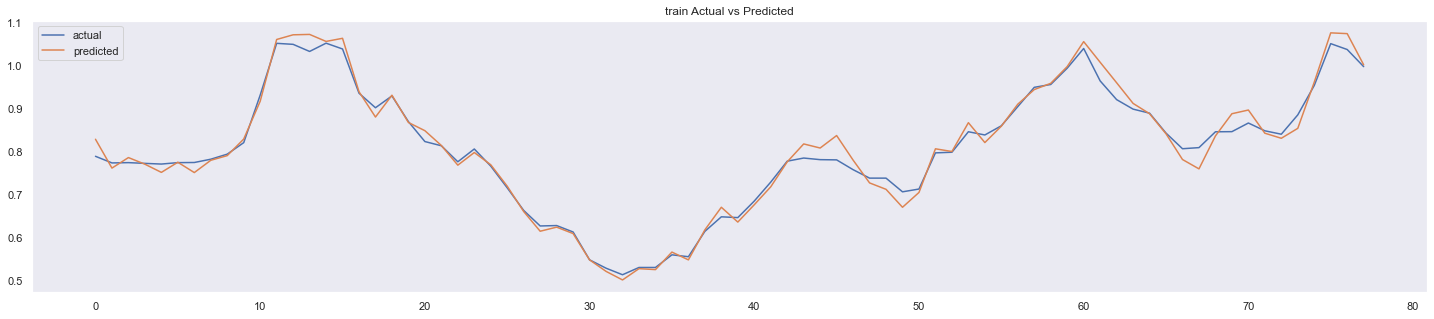

In [90]:
plot_results(ytrain_pred,ytrain_split,title='train Actual vs Predicted')

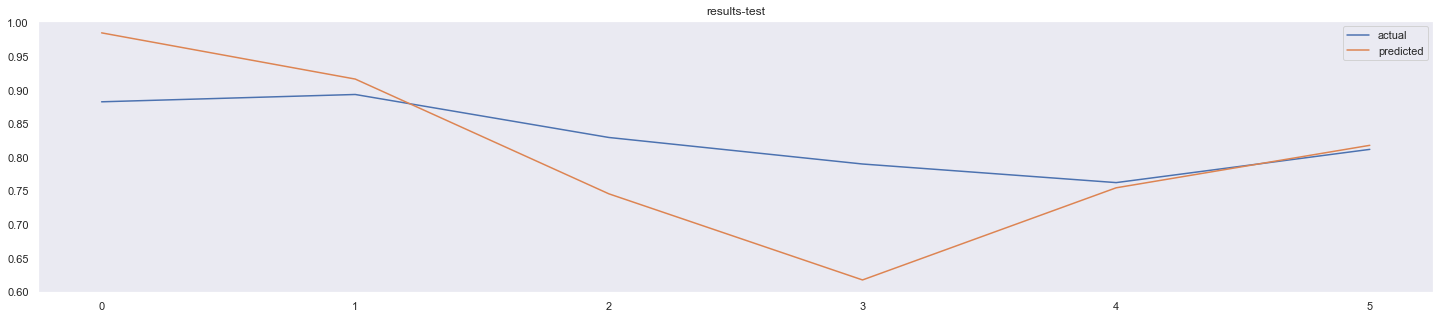

In [91]:
plot_results(ytest_split,ytest_pred,'results-test')

**Evaluation Metrics**: Throughout this notebook I used Root Mean squared error and Mean Absolute error for evaluation. MAPE(Mean Absolute Percentage Error) can also be used but I did not used since it is a skewed metric.

**Further Note** : I tried LSTM with the most correlated features(as shown in EDA section) but the training and test loss were fluctuating. The reason for this may be because of less data LSTM is not able to perform well with increasing number of features and so I opted for supervised regression methods (XGboost as shown above) to predict the steel prices.